
1. **Transformers Library and Hugging Face Transformers**:
    - **Transformers Library:** When we refer to the "transformers library" in the context of machine learning, particularly in natural language processing (NLP), we're typically talking about the Hugging Face's Transformers library. It's a Python library that provides general-purpose architectures (like BERT, GPT-2, RoBERTa, XLM, etc.) for Natural Language Understanding (NLU) and Natural Language Generation (NLG).
    - **Hugging Face Transformers:** Hugging Face is the company that developed the Transformers library. So, "Hugging Face Transformers" and "Transformers library" often refer to the same thing. The library has become the de facto standard for using transformer models in the NLP community due to its ease of use, wide model availability, and active community support.
   
2. **UMAP (Uniform Manifold Approximation and Projection)**:
    - **umap-learn**: UMAP, which stands for Uniform Manifold Approximation and Projection, is a dimension reduction technique (like t-SNE and PCA) but is particularly powerful because it preserves both the global and local structure of data. This makes UMAP very useful for visualization purposes, especially in high-dimensional data scenarios like those encountered in machine learning and NLP. The Python library `umap-learn` is an implementation of UMAP.
    - The advantage of UMAP over other dimensionality reduction methods is its balance between computational efficiency and representation quality. It can handle larger datasets and embed them into fewer dimensions while preserving more of the original data's structure.

In summary, the Transformers library by Hugging Face provides pre-trained models and tools to work with transformer architectures. In contrast, `umap-learn` provides an efficient way to reduce the dimensionality of data for visualization or other purposes. Both are tools in the data science toolkit but serve different primary functions.

In [1]:
!pip install transformers
!pip install umap-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 45.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 75.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82813 sha256=62afa195bab1128a2b050a22761204cec4a75f93fe2860024bf6de063d5ac18a
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55621 sha256=be3a096434f8c42854d5036d9e2af97c51a71e3336adf82a5d4657e1e6b703fe
  Stored in dir

In [2]:
import pandas as pd
import numpy as np
import umap
from sklearn.cluster import KMeans
from transformers import BertTokenizer, BertModel
import torch

# Load BERT model and tokenizer
model_name = "bert-base-uncased"
model = BertModel.from_pretrained(model_name)
tokenizer = BertTokenizer.from_pretrained(model_name)
model.eval()

# Ensure we're using the GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

Let's go line-by-line:

1. **`model_name = "bert-base-uncased"`**:
   - This sets the model name we want to use. In this case, we're using the `"bert-base-uncased"` variant of BERT. This is a smaller, more general-purpose model trained by Google. The "uncased" means that the model does not distinguish between uppercase and lowercase letters, which can be useful for many NLP tasks.

2. **`model = BertModel.from_pretrained(model_name)`**:
   - This line fetches the pre-trained BERT model using the `BertModel` class from the `transformers` library. The model weights are downloaded based on the `model_name` we provided.

3. **`tokenizer = BertTokenizer.from_pretrained(model_name)`**:
   - This fetches the tokenizer associated with our chosen BERT model. The tokenizer is responsible for converting input text into a format that the model can understand, essentially converting words into numerical values (tokens).

4. **`model.eval()`**:
   - Sets the model to evaluation mode. When a model is in training mode, it has certain behaviors (like dropout) to prevent overfitting. However, when you're using a model for inference (making predictions, not training), you don't want those behaviors, so you set the model to evaluation mode using `.eval()`.

5. **`device = torch.device("cuda" if torch.cuda.is_available() else "cpu")`**:
   - This line checks if a GPU (`cuda` device) is available for computation. If it is, `device` will be set to `"cuda"`, otherwise, it'll default to `"cpu"`. Using a GPU can significantly speed up computations, especially for large models like BERT.

6. **`model.to(device)`**:
   - This line moves the model to the specified device (`cuda` or `cpu`). If a GPU is available, the model will be moved to the GPU, enabling faster computation.

In summary, this code snippet initializes a BERT model and tokenizer, sets the model to evaluation mode, and moves the model to the GPU if one is available.

In [3]:
def get_bert_embeddings(texts):
    embeddings = []
    for text in texts:
        tokens = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
        with torch.no_grad():
            outputs = model(**tokens.to(device))
        embeddings.append(outputs.last_hidden_state.mean(dim=1).cpu().numpy().flatten())
    return np.array(embeddings)


This function, `get_bert_embeddings`, is designed to transform an array of text strings (`texts`) into their corresponding BERT embeddings. Let's break down the function step-by-step:

1. **`def get_bert_embeddings(texts):`**:
   - This defines a function called `get_bert_embeddings` that takes a single argument `texts`, which is expected to be a list of text strings.

2. **`embeddings = []`**:
   - Initializes an empty list called `embeddings` which will be used to store the BERT embeddings for each text in `texts`.

3. **`for text in texts:`**:
   - Starts a loop that iterates over each `text` in the `texts` list.

4. **`tokens = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)`**:
   - This line tokenizes the current `text` using the BERT tokenizer. The tokenizer converts the text into tokens that BERT can understand.
     - `return_tensors="pt"`: This instructs the tokenizer to return PyTorch tensors.
     - `truncation=True`: If a text is longer than the specified `max_length`, it will be truncated.
     - `padding=True`: If a text is shorter than the specified `max_length`, it will be padded with zeros.
     - `max_length=128`: This specifies the maximum length for the tokenized sequences. Sequences longer than this will be truncated, and shorter ones will be padded.

5. **`with torch.no_grad():`**:
   - This is a context manager that disables gradient computation. Since we're only doing inference and not training, we don't need gradients. Disabling them can speed up computations and reduce memory usage.

6. **`outputs = model(**tokens.to(device))`**:
   - This line feeds the tokenized `text` into the BERT model to get the embeddings.
     - `**tokens.to(device)`: This unpacks the tokenized data and transfers it to the appropriate device (`cuda` if a GPU is available, otherwise `cpu`).

7. **`embeddings.append(outputs.last_hidden_state.mean(dim=1).cpu().numpy().flatten())`**:
   - This line extracts the embeddings from the model's output and processes them.
     - `outputs.last_hidden_state`: This extracts the sequence of hidden states from the model's output.
     - `.mean(dim=1)`: This computes the mean of the hidden states across the sequence length dimension. This effectively gives us one embedding vector per input text.
     - `.cpu()`: Moves the embeddings from the GPU to the CPU.
     - `.numpy()`: Converts the PyTorch tensor to a numpy array.
     - `.flatten()`: Flattens the numpy array to a 1D array.

8. **`return np.array(embeddings)`**:
   - After processing all texts, this line converts the list of embeddings into a numpy array and returns it.

In essence, this function processes each input text through the BERT model to obtain an embedding vector for that text. These embeddings capture the semantic meaning of the texts in a high-dimensional space.

In [4]:
from google.colab import files
uploaded = files.upload()

Saving gpt.txt to gpt.txt


In [5]:
with open("gpt.txt", "r") as file:
    motifs = [line.strip() for line in file.readlines()]

bert_embeddings = get_bert_embeddings(motifs)


One of the primary uses of BERT (and other transformer models) in downstream tasks is to obtain embeddings for text. These embeddings capture rich semantic information and can be used in various applications such as:

1. **Text Classification**: By taking the embedding of a whole sentence or paragraph (often the [CLS] token's output in BERT) and feeding it into a classifier.
  
2. **Semantic Search**: Comparing the embeddings of a search query with embeddings of documents in a database to find the most semantically relevant documents.
  
3. **Information Retrieval**: Using embeddings to rank and retrieve relevant documents or passages.
  
4. **Semantic Similarity**: Computing the similarity between two pieces of text by comparing their embeddings.

5. **Transfer Learning**: Fine-tuning BERT on a specific task using a smaller dataset, leveraging the knowledge BERT has gained from pre-training on a massive corpus.

6. **Feature Extraction**: Using BERT embeddings as features in traditional machine learning models.

However, BERT can also be fine-tuned end-to-end for specific tasks, such as question answering or named entity recognition, without explicitly extracting embeddings for downstream use. In these cases, BERT is adapted to the specific task by adjusting its weights during the fine-tuning process on task-specific data.

In summary, while obtaining embeddings is a primary use-case for BERT, it's not the only one. The model's flexibility allows it to be applied in various ways depending on the specific application and requirements.

In [6]:
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='cosine')
embeddings_2d = reducer.fit_transform(bert_embeddings)

This code is using UMAP (Uniform Manifold Approximation and Projection) to reduce the dimensionality of the BERT embeddings. UMAP is a popular technique for visualizing high-dimensional data in 2D or 3D space. Let's break down the code:

1. **`reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='cosine')`**:
    - This creates a UMAP reducer object.
    - `n_neighbors=15`: This parameter determines the number of neighboring data points UMAP will consider when creating the low-dimensional representation. A smaller value will focus on preserving local structures, while a larger value will emphasize preserving larger global structures.
    - `min_dist=0.1`: This parameter controls the effective minimum distance between embedded points in the low-dimensional space. Smaller values will allow points to be closer together, leading to more clustered embeddings, whereas larger values will spread out the points.
    - `metric='cosine'`: This sets the metric used to measure distance in the high-dimensional space. For text data, the cosine distance is often more meaningful than the default Euclidean distance, as it measures the angle between vectors rather than their absolute distances. With cosine distance, vectors that point in the same direction (regardless of their magnitude) are considered close.

2. **`embeddings_2d = reducer.fit_transform(bert_embeddings)`**:
    - This line applies the UMAP algorithm to the high-dimensional BERT embeddings, reducing them to 2D for visualization.
    - `fit_transform`: This method first fits the UMAP model to the high-dimensional data (`bert_embeddings`) and then transforms that data into the low-dimensional space. The result is a 2D representation of each data point, which can be easily plotted.

In summary, these lines of code take the high-dimensional BERT embeddings and transform them into a 2D space using UMAP. This 2D representation retains as much of the original data's structure as possible, making it useful for visualizing patterns, clusters, or relationships in the data.

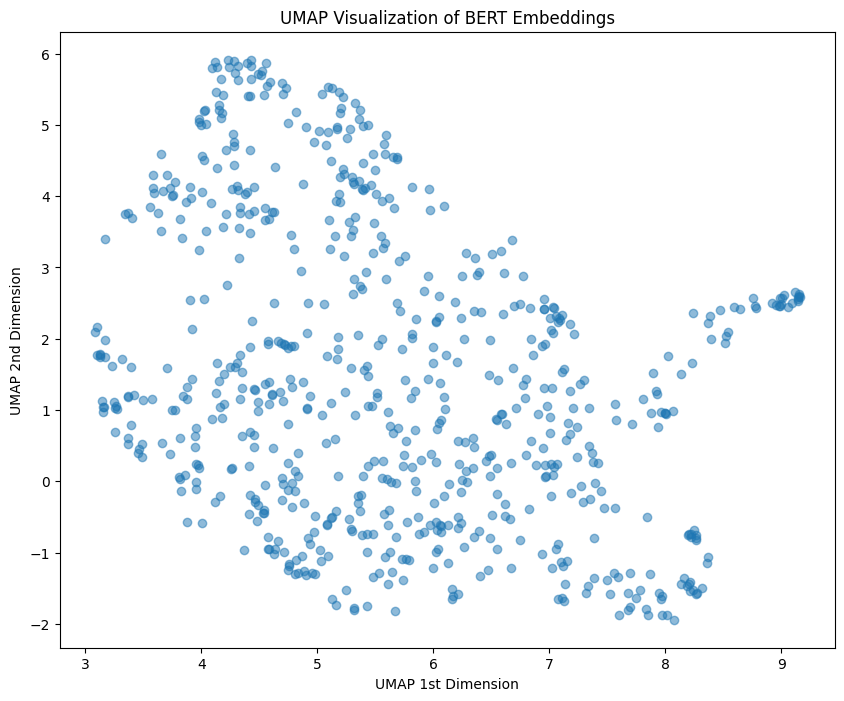

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], alpha=0.5)
plt.title('UMAP Visualization of BERT Embeddings')
plt.xlabel('UMAP 1st Dimension')
plt.ylabel('UMAP 2nd Dimension')
plt.show()


Now that you have the embeddings, the following are the general steps to proceed:

1. **Visualize the 2D embeddings**:
    - Use a scatter plot to visualize the 2D embeddings from UMAP. This will give you a sense of the distribution of the data and any clusters that might be forming.
    ```python
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 8))
    plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], alpha=0.5)
    plt.title('UMAP Visualization of BERT Embeddings')
    plt.xlabel('UMAP 1st Dimension')
    plt.ylabel('UMAP 2nd Dimension')
    plt.show()
    ```

2. **Cluster the BERT embeddings**:
    - Use a clustering algorithm to identify clusters within the embeddings. KMeans is a common choice, but other algorithms such as DBSCAN or HDBSCAN might be more appropriate depending on the distribution of the data.
    - If using KMeans, you might need to determine the optimal number of clusters (e.g., using the Elbow method or Silhouette analysis).

3. **Analyze and label the clusters**:
    - After clustering, examine the fine-grained motifs within each cluster to understand the common theme or meaning. You can then assign a label (general motif) to each cluster based on its content.
    - This step can be iterative, where you adjust the clustering parameters or even the number of clusters based on the coherence and interpretability of the clusters.

4. **Map each fine-grained motif to its cluster's label**:
    - Create a mapping of each fine-grained motif to its corresponding cluster's label (general motif).

5. **Evaluate the quality of the clustering**:
    - Inspect some clusters manually to ensure that the fine-grained motifs within each cluster are semantically related.
    - You can also use metrics like silhouette score or Davies-Bouldin Index if you want quantitative measures, but keep in mind that the ultimate evaluation is often subjective, based on how meaningful and coherent the clusters are.

6. **Adjust and iterate as needed**:
    - Based on the quality of the clusters, you might need to revisit some of the previous steps. For example, you might adjust the UMAP parameters, try a different clustering algorithm, or even fine-tune the BERT embeddings.

7. **Save and utilize the final mapping**:
    - Once satisfied with the clustering, save the mapping of fine-grained motifs to general motifs for further use or integration into your application.

Remember, the goal is to obtain meaningful clusters that group fine-grained motifs into broader themes or general motifs. The process might require iterations and adjustments based on the results and the quality of the clusters.

The Silhouette analysis is a method used to determine the separation distance between the resulting clusters. More distant clusters lead to better clusterings.

The Silhouette value measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from \(-1\) to \(1\), where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.

The Silhouette value is computed for each data point, and it is given by the formula:

\[
s(i) = \frac{b(i) - a(i)}{\max[a(i), b(i)]}
\]

Where:

- \( s(i) \) is the silhouette value of data point \( i \).
- \( a(i) \) is the average distance from the \(i\)th data point to the other data points in the same cluster.
- \( b(i) \) is the smallest average distance from the \(i\)th data point to data points in a different cluster, minimized over clusters.

The silhouette analysis can be used to determine the degree of separation between clusters. For instance, if you're using the k-means clustering algorithm, you can compute the average silhouette value for different values of \( k \) (number of clusters). The optimal number of clusters \( k \) is the one that maximizes the average silhouette value.

However, while silhouette analysis provides a useful heuristic, it's essential to note that the real-world implications of the clustering should also be considered. In other words, the clusters should be interpretable and meaningful for the given application or problem domain.

Below are the code snippets for both the Elbow method and the Silhouette analysis, specifically tailored for our UMAP-reduced BERT embeddings:

### 1. Elbow Method:

The Elbow method involves plotting the explained variation as a function of the number of clusters, and picking the "elbow" of the curve as the number of clusters to use.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

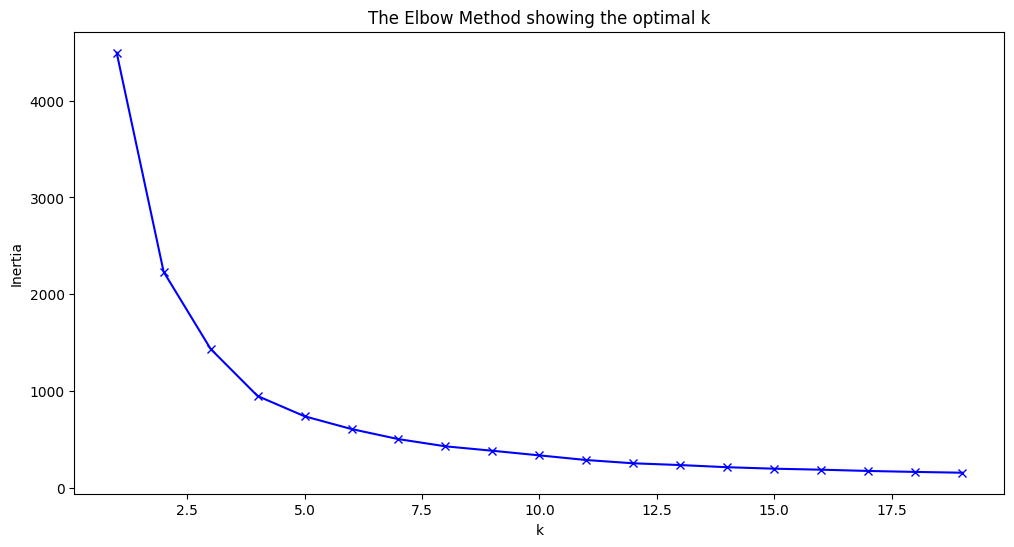

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculating the sum of squared distances for different number of clusters
inertia = []
K = range(1, 20)  # This range can be adjusted based on the problem
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(embeddings_2d)
    kmeanModel.fit(embeddings_2d)
    inertia.append(kmeanModel.inertia_)

# Plotting the elbow
plt.figure(figsize=(12, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
#plt.show()
plt.savefig("elbow.png")



2. Silhouette Analysis:
The silhouette analysis measures the quality of the clusters that are formed by the algorithm.

In [10]:
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]  # This range can be adjusted

for n_clusters in range_n_clusters:
    # Create a subplot
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(12, 6)

    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(embeddings_2d) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(embeddings_2d)

    silhouette_avg = silhouette_score(embeddings_2d, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(embeddings_2d, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    plt.savefig(f"silhouette_plot_{n_clusters}_clusters.png")
    plt.clf()

    # plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.45043615


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.41961306


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.44622192


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.44198883


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.44834155


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7 The average silhouette_score is : 0.45097142


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8 The average silhouette_score is : 0.42370993


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9 The average silhouette_score is : 0.41850138


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 10 The average silhouette_score is : 0.40304258


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [12]:
from google.colab import files

for n_clusters in range_n_clusters:
    files.download(f"silhouette_plot_{n_clusters}_clusters.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
from google.colab import files
files.download("elbow.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Let's start by analyzing the images you've uploaded:

1. **Elbow Plot**:
   - The elbow plot provides a visual representation of the variance explained as a function of the number of clusters. We aim to choose a number of clusters so that adding another cluster doesn't give much better modeling of the data.
   - From the `elbow.png` image, it seems the "elbow" of the curve (where the explained variance starts to level off) is around 15-17.5, suggesting that 18 clusters might be a good choice.

2. **Silhouette Plots**:
   - Silhouette plots display a measure of how close each point in one cluster is to the points in the neighboring clusters. Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.
   - Ideally, you want the silhouette scores to be as high as possible. This would indicate that the clusters are well apart from each other and clearly distinguished.

Based on the silhouette plots you provided:
- The plot for 2 clusters shows a clear distinction between the two clusters, with both clusters having positive silhouette scores.
- The plots for 3 and 4 clusters also seem reasonable, with the majority of the data points in each cluster having positive silhouette scores.
- From 5 clusters onwards, we start to see some clusters with negative silhouette scores, suggesting that those clusters might not be well-separated from each other.

Considering both the elbow plot and the silhouette plots, choosing between 3 to 5 clusters might be a good balance. While the elbow plot suggests a higher number (around 18), the silhouette plots indicate that the quality of clusters starts to degrade after 5.

Given this analysis, you might consider choosing 4 or 5 clusters for your KMeans clustering on the BERT embeddings. Once you have chosen the number of clusters, you can proceed with the clustering and then inspect the motifs within each cluster to see if they make intuitive sense.

Great! Now that you have decided on 18 clusters based on the elbow method, the next steps would be:

1. **KMeans Clustering with 18 clusters**: Apply the KMeans clustering algorithm to your BERT embeddings to cluster the text into 18 groups.

2. **Assign Cluster Labels**: After clustering, each text will be assigned a cluster label (0 to 17). You should then append these labels to your original dataset so you can analyze which texts belong to which clusters.

3. **Cluster Interpretation**:
   - For each cluster, inspect the texts that are assigned to it. This can give you an initial understanding of the potential theme or topic of that cluster.
   - Another useful technique is to identify the top terms or words associated with each cluster. This can be done by looking at the mean BERT embeddings of the texts in a cluster and then identifying the terms that have the highest weights.
   - Visualization: Use dimensionality reduction (e.g., UMAP or t-SNE) on the BERT embeddings to visualize the clusters in 2D space. This can give you a visual sense of how well-separated the clusters are.

4. **Evaluation** (Optional but Recommended):
   - Internal metrics: Use metrics like Silhouette score, Davies-Bouldin index, etc., to evaluate the compactness and separation of your clusters.
   - External metrics (if you have ground truth): If you have any form of ground truth or labels, you can use metrics like Adjusted Rand Index, Normalized Mutual Information, etc., to evaluate the clustering results.

5. **Refinement**:
   - Based on your cluster interpretation and evaluation, you might decide to refine the number of clusters or experiment with different clustering algorithms or embeddings.
   - Hyperparameter tuning: Experiment with different initializations and hyperparameters of the KMeans algorithm to potentially achieve better clustering results.

6. **Use Cluster Labels for Downstream Tasks**:
   - Depending on your ultimate goal, you can use these cluster labels for various purposes, like content recommendation, content organization, or as features for other machine learning tasks.

7. **Documentation and Presentation**:
   - Document your methodologies, findings, cluster interpretations, and potential use cases for the clusters.
   - Visual representations (like word clouds, 2D visualizations, and bar graphs of top terms) can aid in presenting your findings to stakeholders.

Would you like to proceed with these steps in your Colab notebook? If so, I can guide you through the code for each step.

# KMEANS with BERT embeddings

1. KMeans Clustering with 18 clusters
First, we'll perform KMeans clustering on the BERT embeddings using 18 clusters.

In [6]:
from sklearn.cluster import KMeans

# Number of clusters
n_clusters = 18

# KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(bert_embeddings)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2. Assign Cluster Labels
Once you have the cluster_labels, you can add them to your original data:

In [8]:
import pandas as pd

# Create a dataframe from the motifs
df = pd.DataFrame(motifs, columns=['Motif'])

# Add the cluster labels to the dataframe
df['Cluster_Label'] = cluster_labels



3. Cluster Interpretation
To get an initial understanding of each cluster:

In [10]:
for i in range(n_clusters):
    print(f"Cluster {i}:\n")
    print(df[df['Cluster_Label'] == i]['Motif'].head(10))  # Replace 'Text_Column_Name' with the appropriate column name in your dataframe
    print("\n")


Cluster 0:

44        Beware of Aiding Your Adversary
45                       Beware of Deceit
101                    Courage and Action
102                    Courage and Safety
103                Courtesy and Etiquette
236              Humility and Divine Will
248    Immediate Action in Face of Threat
337                   Message of Humility
431             Preparation and Vigilance
443                       Quality of Life
Name: Motif, dtype: object


Cluster 1:

6        Active vs Passive Faith
21        Appearance vs. Reality
28         Arrogance vs Humility
36     Authenticity vs Imitation
50          Bravery vs Cowardice
62        Coercion vs. Free Will
134         Democracy vs Tyranny
140               Desire vs Need
169       Expectation vs Reality
197    Flexibility over Rigidity
Name: Motif, dtype: object


Cluster 2:

1                           Abuse of Power
2                           Abuse of Trust
51     Breaking Stereotypes and Prejudices
72            Complicity in

## Try 12 clusters

In [11]:
from sklearn.cluster import KMeans

# Number of clusters
n_clusters = 12

# KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(bert_embeddings)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [12]:
import pandas as pd

# Create a dataframe from the motifs
df = pd.DataFrame(motifs, columns=['Motif'])

# Add the cluster labels to the dataframe
df['Cluster_Label'] = cluster_labels

In [13]:
for i in range(n_clusters):
    print(f"Cluster {i}:\n")
    print(df[df['Cluster_Label'] == i]['Motif'].head(10))  # Replace 'Text_Column_Name' with the appropriate column name in your dataframe
    print("\n")

Cluster 0:

5                Accountability
10                   Adaptation
17                        Aging
19           Analysis Paralysis
29     Attempted Reconciliation
33                 Authenticity
66                Communication
126                   Deception
141                 Desperation
148           Disguised Motives
Name: Motif, dtype: object


Cluster 1:

24        Appreciating Regularity and Consistency
94                Cooperation and Interdependence
97                                 Cost of Living
147    Discrepancy between Appearance and Reality
250     Immediate Gratification vs Long-term Gain
254               Impermanence of Material Wealth
267                          Incremental Progress
276                  Inequity of Power Structures
277                       Inevitability of Change
278                         Inevitability of Fate
Name: Motif, dtype: object


Cluster 2:

47               Beware of Unintended Consequences
49                     Boasting and

Let's review each cluster and attempt to assign a high-level label based on the motifs within it.

1. **Cluster 0**:
Themes: Accountability, Adaptation, Aging, Analysis, Reconciliation, Authenticity, Communication, Deception, Desperation, Disguised Motives.
Label: **Personal Responsibility and Growth**

2. **Cluster 1**:
Themes: Regularity, Cooperation, Cost of Living, Reality vs Appearance, Gratification, Material Wealth, Progress, Inequity, Inevitability.
Label: **Materialism and Life's Realities**

3. **Cluster 2**:
Themes: Unintended Consequences, Overconfidence, Alliances, Complacency, Consequences (of Inaction, Misjudgment, Opportunism), Dangers of Pride and Ambition.
Label: **Consequences of Actions and Attitudes**

4. **Cluster 3**:
Themes: Adaptability, Aesthetics, Authenticity, Trust, Avoidance, Stereotypes, Collective Responsibility, Communication, Conformity.
Label: **Interpersonal Relations and Perceptions**

5. **Cluster 4**:
Themes: Abuse of Power, Trust, Reconciliation, Comparative Misfortune, Complicity, Misplaced Admiration, Control of Emotions, Cowardice.
Label: **Power Dynamics and Emotional Responses**

6. **Cluster 5**:
Themes: Acceptance, Adaptability, Reactions, Audience Expectations, Authenticity, Being Content, Causal Chain, Changing Others, Class Differences.
Label: **Self-awareness and External Perceptions**

7. **Cluster 6**:
Themes: Acceptance of One’s Role, Appreciation, Balance, Caution, Cleverness, Consistency, Courage.
Label: **Personal Values and Character**

8. **Cluster 7**:
Themes: Adaptability, Awareness of Threat, Bias, Consequences of Actions, Comparison, Deception.
Label: **Adaptation to Threats and Changes**

9. **Cluster 8**:
Themes: Absurdity, Appreciation, Authenticity, Awareness, Balance, Change, Consequences of Gullibility, Cost.
Label: **Life's Ironic Realities and Cost of Choices**

10. **Cluster 9**:
Themes: Active vs Passive, Appearance vs. Reality, Bravery vs Cowardice, Democracy vs Tyranny, Desire vs Need, Expectation vs Reality.
Label: **Dichotomies and Life's Contrasts**

11. **Cluster 10**:
Themes: Anticipation, Fear, Blame, Children, Comparisons, Envy, Danger, Cunning, Deceit.
Label: **Fear, Danger, and Deception**

12. **Cluster 11**:
Themes: Adapting to Change, Aim to Please, Appearances, Avoidance, Beware of Aiding, Deceit, Flattery, Caution, Choosing Sides.
Label: **Interactions, Trust, and Deception**

These labels are general summaries based on the motifs provided. The goal is to capture the essence of each cluster. They can be refined or adjusted based on further insights or specific needs.

## Try 12 clusters

In [15]:
from sklearn.cluster import KMeans

# Number of clusters
n_clusters = 30

# KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(bert_embeddings)

import pandas as pd

# Create a dataframe from the motifs
df = pd.DataFrame(motifs, columns=['Motif'])

# Add the cluster labels to the dataframe
df['Cluster_Label'] = cluster_labels

for i in range(n_clusters):
    print(f"Cluster {i}:\n")
    print(df[df['Cluster_Label'] == i]['Motif'].head(10))
    print("\n")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0:

49                    Boasting and Overconfidence
59                       Circumstantial Alliances
71                                    Complacency
84                    Consequences of Misjudgment
94                Cooperation and Interdependence
127               Deception and Misrepresentation
147    Discrepancy between Appearance and Reality
151                    Disproportionate Reactions
302                      Irresponsible Leadership
303         Irreversible Consequences of Division
Name: Motif, dtype: object


Cluster 1:

43              Be Content
52            Causal Chain
63     Collective Behavior
64      Collective Defense
91             Contentment
165        Ethical Dilemma
166     Everyone Has Value
183         False Security
226           Hidden Value
230         Human Behavior
Name: Motif, dtype: object


Cluster 2:

1                        Abuse of Power
72         Complicity in Unfair Systems
149                          Dishonesty
238             

The clusters formed with 30 clusters appear to have more specific themes compared to the previous attempts. Here are some labels based on the motifs within each cluster:

1. **Overconfidence and Unintended Consequences**: Cluster 0 seems to center around themes of overestimation of one's abilities and the repercussions of such actions.
2. **Interpersonal Dynamics and Understanding**: Cluster 1 touches on understanding and balancing interpersonal relationships.
3. **Power and its Misuse**: Cluster 2 deals with the abuse and misuse of power and authority.
4. **Perception and Collective Behavior**: Cluster 3 relates to the perspectives people hold and how they act collectively.
5. **Decision Making and Assertiveness**: Cluster 4 revolves around decisive actions and balancing assertiveness.
6. **Opportunism and Fate**: Cluster 5 pertains to seizing opportunities and the inevitability of certain outcomes.
7. **Understanding Consequences**: Cluster 6 is about the repercussions of various actions and attitudes.
8. **Values and Character**: Cluster 7 reflects on consistent personal values and trustworthy character.
9. **Life's Ironic Realities**: Cluster 8 deals with ironies and unpredictable outcomes in life.
10. **Life's Dichotomies**: Cluster 9 delves into the contrasts and oppositions present in various facets of life.
11. **Awareness and Impulsivity**: Cluster 10 focuses on being alert to surroundings and the results of impulsive decisions.
12. **Deception and Trust**: Cluster 11 is about the dynamics between deceit, trust, and their consequences.
13. **Comparison and Relative Value**: Cluster 12 is themed around comparing oneself with others and understanding relative values.
14. **Life's Realities and Materialism**: Cluster 13 delves into the materialistic aspects of life and their implications.
15. **Appearance vs. Reality**: Cluster 14 centers on the differences between how things appear and their true nature.
16. **Personal Growth and Relationships**: Cluster 15 pertains to personal development and interpersonal dynamics.
17. **Power Dynamics and Trust**: Cluster 16 is about the misuse of power and the repercussions of misplaced trust.
18. **Instant Gratification vs. Long-term Rewards**: Cluster 17 deals with the comparison between immediate rewards and long-term benefits.
19. **Perception and Value**: Cluster 18 touches on how perceptions can influence our understanding of value.
20. **Acceptance and Personal Growth**: Cluster 19 is about coming to terms with certain realities and using them for personal growth.
21. **Understanding Consequences and Deception**: Cluster 20 delves into understanding the repercussions of various decisions and the role of deceit.
22. **Emotions, Fear, and Desire**: Cluster 21 is themed around various emotions and their influences.
23. **Exploitation and Environment**: Cluster 22 centers on the misuse of resources, especially in an environmental context.
24. **Change, Injustice, and Lessons**: Cluster 23 deals with adapting to change, understanding injustices, and drawing lessons from experiences.
25. **Self-awareness and Inner Qualities**: Cluster 24 touches on the importance of understanding oneself and valuing internal qualities.
26. **Adaptability and Cultural Understanding**: Cluster 25 is about adjusting to various situations and understanding different cultural nuances.
27. **Resilience in Adversity**: Cluster 26 revolves around the theme of resilience and bouncing back from difficult situations.
28. **Vigilance and Preparedness**: Cluster 27 is about being alert and prepared for potential challenges.
29. **Reciprocity**: Cluster 28 has a single motif, which relates to the concept of "tit for tat" or reciprocation.
30. **Courage, Bravery, and Respect**: Cluster 29 deals with themes of bravery, facing challenges head-on, and earning respect.

These are potential labels based on the motifs within each cluster. They should be taken as a starting point, and I recommend reviewing each cluster to ensure that the label accurately captures the essence of the motifs it contains.

In [16]:

from sklearn.cluster import KMeans

# Number of clusters
n_clusters = 8

# KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(bert_embeddings)

import pandas as pd

# Create a dataframe from the motifs
df = pd.DataFrame(motifs, columns=['Motif'])

# Add the cluster labels to the dataframe
df['Cluster_Label'] = cluster_labels

for i in range(n_clusters):
    print(f"Cluster {i}:\n")
    print(df[df['Cluster_Label'] == i]['Motif'].head(10))
    print("\n")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0:

7                               Adaptability
11                   Adaptation and Survival
15     Aesthetic Differences and Perceptions
60                         Class Differences
63                       Collective Behavior
64                        Collective Defense
67     Communication and Conflict Resolution
73                       Conflict Resolution
99                         Counter-Deception
106                        Critical Thinking
Name: Motif, dtype: object


Cluster 1:

13    Adapting to Changing Circumstances
18        Aim to Please All, Please None
22             Appearances are Deceptive
37            Avoidance Isn't a Solution
44       Beware of Aiding Your Adversary
45                      Beware of Deceit
46                    Beware of Flattery
54      Caution in the Face of Deception
58            Choosing Sides and Loyalty
59              Circumstantial Alliances
Name: Motif, dtype: object


Cluster 2:

0      Absurdity and Ironic Tragedy
2         

In [21]:
# Adjusting the column names to match the dataframe
cluster_labels = [
    "Collaboration",
    "Deception",
    "Emotions",
    "Power",
    "Growth",
    "Choices",
    "Awareness",
    "Values"
]

# Create a dictionary mapping cluster numbers to their labels
cluster_to_label = {i: label for i, label in enumerate(cluster_labels)}

# Remove unwanted line breaks from the 'Motif' column
df['Motif'] = df['Motif'].str.strip()

# Map the cluster numbers in the 'Cluster_Label' column to their corresponding labels
df['label'] = df['Cluster_Label'].map(cluster_to_label)

# Save the dataframe to a CSV
df[['Motif', 'label']].to_csv('mapped_motifs_bert.csv', index=False)

# If you're using Google Colab or Jupyter Notebook, you can use the below line to download the file
files.download('mapped_motifs_bert.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>